## 02-perception-percentages-blackbox-discrimination.ipynb

This notebook summarizes two key perception indicators from the survey dataset (`data.csv`):

- Computes the percentage of respondents who **Agree/Strongly agree** that AI recruitment feels like a **“black box.”**
- Computes the percentage of respondents who **Agree/Strongly agree** that AI recruitment may **discriminate** against certain groups.

It converts Likert responses to numeric values (1-5) and visualizes both results using simple horizontal bar charts.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

df = pd.read_csv("data.csv") #reads data from the same repository
df.shape

(84, 28)

In [2]:
aware_col = "Before this survey, were you aware that some companies use AI-based systems in recruitment and selection (e.g., automated CV screening, AI ranking of candidates, AI video interview analysis)?"

pref_col = "If you had two similar job opportunities, and the only difference was the recruitment process, which would you prefer?"
screen_col = "For the initial screening of applications (deciding who is invited to the first interview), which option would you feel most comfortable with?"
likelihood_col = "If a company clearly states that it uses AI tools as part of its recruitment process, how likely would you be to apply for a job or internship there?"

# Likert items for constructs
same_criteria = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [AI-based recruitment treats all candidates according to the same criteria.]"

reduce_bias = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [Using AI in recruitment can help reduce human bias in hiring decisions.]"

unfair_rev = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [AI-based recruitment systems are inherently unfair. (reverse-coded)]"

understand = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [I understand, at least in general terms, how AI recruitment systems evaluate candidates.]"

explain = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [Companies clearly explain when and how they use AI in their recruitment process.]"

blackbox_rev = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [AI-based recruitment systems feel like a “black box” to me. (reverse-coded)]"

trust_item = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [I trust AI systems to evaluate candidates fairly.]"

discrim_rev = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [I worry that AI recruitment systems might discriminate against certain groups of applicants. (reverse-coded)]"

apply_item = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [I would apply to a company that uses AI in its recruitment process.]"

discourage_rev = "Please indicate how strongly you agree or disagree with the following statements about AI-based recruitment systems.\n(AI-based recruitment includes tools such as automated CV screening, AI ranking of candidates, AI video interview analysis, etc.) [Knowing that a company uses AI to screen applications would discourage me from applying. (reverse-coded)]"


In [3]:
likert_map = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neither agree nor disagree": 3,
    "Agree": 4,
    "Strongly agree": 5
}

def to_num(s):
    return s.map(likert_map)

def reverse_1to5(x):
    return 6 - x

% agreeing AI feels like a black box (Agree/Strongly agree): 61.9%
% fearing discrimination (Agree/Strongly agree): 59.5%


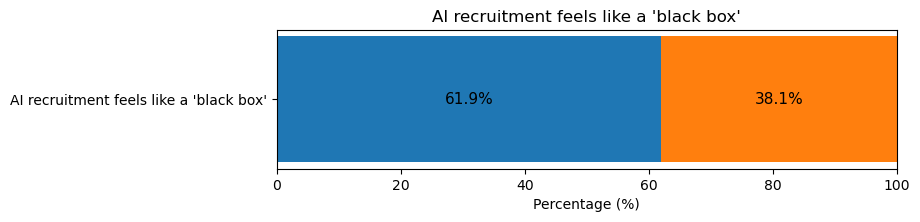

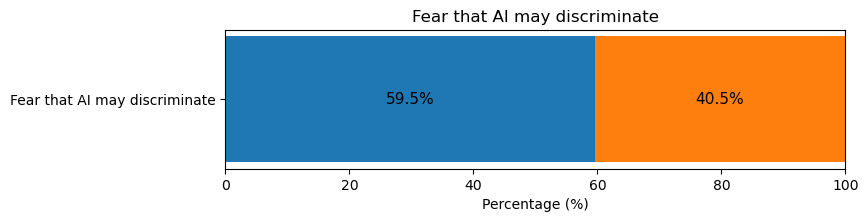

In [4]:
#this is not reversed (or in raw) so it matches the statement meaning
black_raw = to_num(df[blackbox_rev])        # higher = more "black box"
discrim_raw = to_num(df[discrim_rev])       # higher = more worry discrimination

black_pct = (black_raw >= 4).mean() * 100
discrim_pct = (discrim_raw >= 4).mean() * 100

print(f"% agreeing AI feels like a black box (Agree/Strongly agree): {black_pct:.1f}%")
print(f"% fearing discrimination (Agree/Strongly agree): {discrim_pct:.1f}%")

# 100% bar visualization (clean)
def percent_bar(title, pct_agree):
    plt.figure(figsize=(8,1.8))
    plt.barh([title], [pct_agree])
    plt.barh([title], [100-pct_agree], left=[pct_agree])
    plt.xlim(0,100)
    plt.xlabel("Percentage (%)")
    plt.title(title)
    plt.text(pct_agree/2, 0, f"{pct_agree:.1f}%", ha="center", va="center", fontsize=11)
    plt.text(pct_agree + (100-pct_agree)/2, 0, f"{100-pct_agree:.1f}%", ha="center", va="center", fontsize=11)
    plt.show()

percent_bar("AI recruitment feels like a 'black box'", black_pct)
percent_bar("Fear that AI may discriminate", discrim_pct)
